In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
X_train = pd.read_csv("Training Data/Logistic_X_Train.csv")
Y_train = pd.read_csv("Training Data/Logistic_Y_Train.csv")

X_train.shape, Y_train.shape

((3000, 3), (3000, 1))

In [3]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
Y_train.head()

,label
0,1
1,1
2,1
3,0
4,0


In [5]:
# Extract Values from DataFrame

X_train = X_train.values
Y_train = Y_train.values

In [6]:
X_train.shape, Y_train.shape

((3000, 3), (3000, 1))

## Feature Normalization

In [7]:
mean = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)

X_train = (X_train - mean)/sigma

## Data Visualization

In [8]:
np.unique(Y_train)
# The dataset contains only 2 classes, lets visualize them

array([0, 1])

In [9]:
# For 3D plots you need to 

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [10]:
# Separate Classes to make separate labels

class0 = Y_train == 0
class0 = class0.reshape((-1, ))
class1 = Y_train == 1
class1 = class1.reshape((-1, ))

<IPython.core.display.Javascript object>


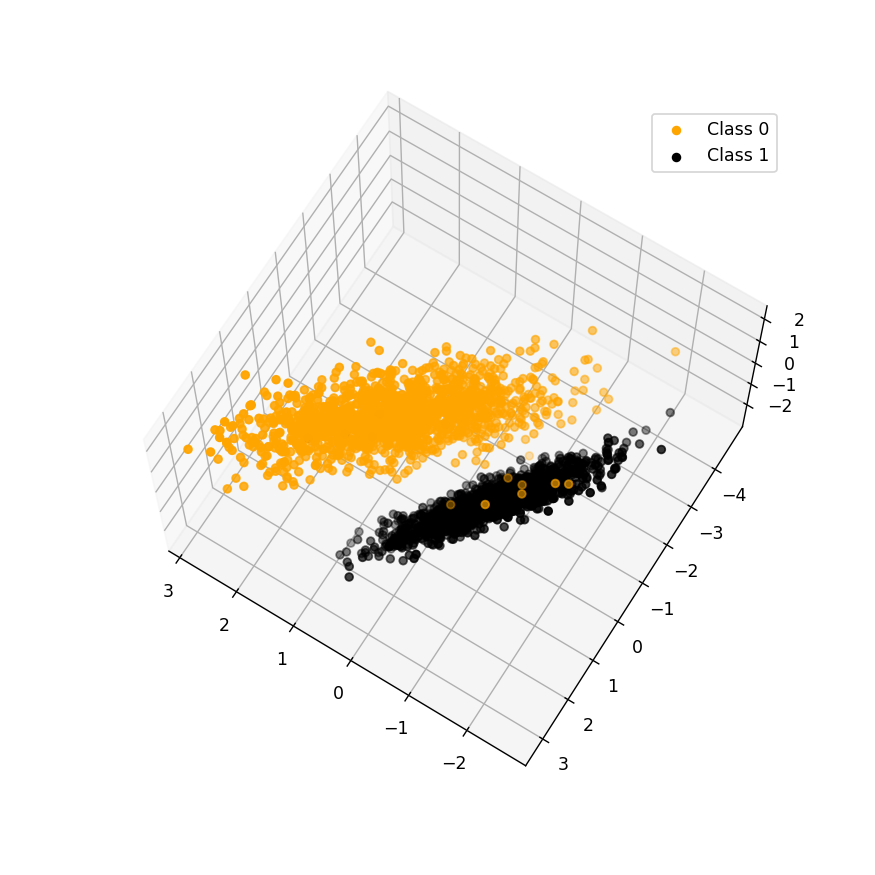

In [11]:
fig = plt.figure(figsize = (7, 7)) # Fig Window size

ax = fig.add_subplot(111, projection='3d') # Now axes is 3D and ax is its object

ax.scatter(X_train[class0, 0], X_train[class0, 1], X_train[class0, 2], color = "orange", label = "Class 0")
ax.scatter(X_train[class1, 0], X_train[class1, 1], X_train[class1, 2], color = "black", label = "Class 1")
ax.legend()


#Its beautiful though 😍️